1. Importar bibliotecas de python   

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point, Polygon

from datetime import timedelta, datetime


2. Generar mapa

In [42]:
year = 2024
map = gpd.read_file('geo-data/limite250_l_.shp')

3. Cargar archivos del año

In [43]:
data = pd.read_csv(f'data/{year}.csv')
data.columns

Index(['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'Municipio', 'Comunidad',
       'Productor', 'Cultivo', 'Variedad', 'Etapa_Fenologica',
       'Actividad_Realizada', 'Especie_Detectada', 'No_Inscripcion',
       'Superficie_Ha', 'Resultado', 'Sitios_Muestreados',
       'Individuos_Encontrados', 'Estado_Biologico', 'Infestacion',
       'Unidad_Medida', 'Etapa_Fasica', 'Coloracion', 'Tipo_Formacion',
       'Recomendaciones', 'Estado', 'JLSV', 'Ano', 'Mes', 'Semana', 'Tecnico',
       'Mes_IF', 'CampanaID', 'EjercicioID', 'EstadoID', 'JuntaID',
       'TecnicoID', 'SiembraID', 'ProductorID', 'AnoMapa', 'Version',
       'SitioID', 'ActividadID', 'ID', 'AddRecord', 'ChangeRecord',
       'SMARTPHONE', 'Anual'],
      dtype='object')

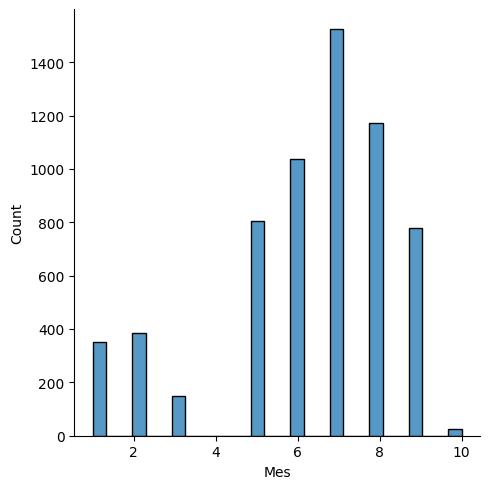

In [44]:
sns.displot(data, x="Mes")


In [45]:
data = data[data['Actividad_Realizada'] == 'Exploración']
data['Resultado'].value_counts()

Resultado
Negativo    4902
Positivo     660
Name: count, dtype: int64

In [52]:
data_output = data[['Fecha','Latitud','Longitud','Resultado']]
data_output['Fecha'] = data_output['Fecha'].apply(lambda d : datetime.strptime(d,'%d/%m/%Y'))
data_output['Fecha_inicio'] = data_output['Fecha'] - timedelta(days=96)
data_output

C:\Users\seder\AppData\Local\Temp\ipykernel_28908\1312049016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_output['Fecha'] = data_output['Fecha'].apply(lambda d : datetime.strptime(d,'%d/%m/%Y'))
C:\Users\seder\AppData\Local\Temp\ipykernel_28908\1312049016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_output['Fecha_inicio'] = data_output['Fecha'] - timedelta(days=96)


,Fecha,Latitud,Longitud,Resultado,Fecha_inicio
0,2024-01-02,20.87519,-89.19463,Negativo,2023-09-28
1,2024-01-02,20.88422,-89.34875,Negativo,2023-09-28
2,2024-01-03,20.86403,-89.33215,Negativo,2023-09-29
3,2024-01-02,20.89794,-89.43314,Negativo,2023-09-28
4,2024-01-02,20.83351,-89.30793,Negativo,2023-09-28
...,...,...,...,...,...
6216,2024-09-26,21.14855,-88.85028,Negativo,2024-06-22
6217,2024-09-26,21.14259,-88.88364,Negativo,2024-06-22
6218,2024-09-26,21.12988,-88.87181,Negativo,2024-06-22
6219,2024-09-26,21.12769,-88.85572,Positivo,2024-06-22


In [53]:
data_filtered = pd.DataFrame(np.unique(data_output[['Latitud', 'Longitud']], axis=0), columns=['Latitud','Longitud'])
data_filtered.to_csv(f'data/{year}-unique-points.csv',index=False)

C:\Users\seder\AppData\Local\Temp\ipykernel_28908\2608703572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_output['Positivo'] = np.where(data_output['Resultado']=='Positivo',1,0)
C:\Users\seder\AppData\Local\Temp\ipykernel_28908\2608703572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_output['Negativo'] = np.where(data_output['Resultado']=='Negativo',1,0)


<Axes: xlabel='Mes'>

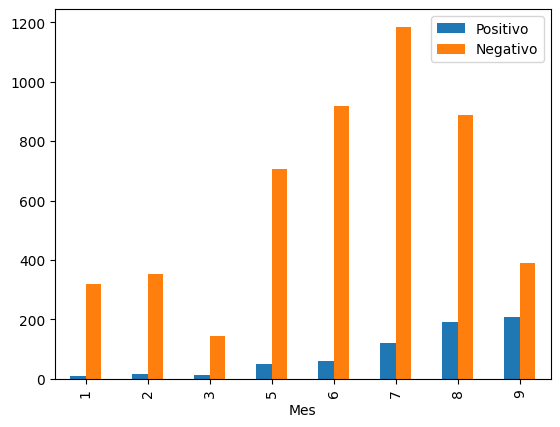

In [54]:
#data_output.groupby(data_output["Fecha"].dt.month)['Fecha'].count().plot(kind="bar", xlabel="Mes")
data_output['Positivo'] = np.where(data_output['Resultado']=='Positivo',1,0)
data_output['Negativo'] = np.where(data_output['Resultado']=='Negativo',1,0)

data_output.groupby(data_output["Fecha"].dt.month).agg({'Positivo':'sum','Negativo':'sum'}).plot(kind="bar", xlabel="Mes")


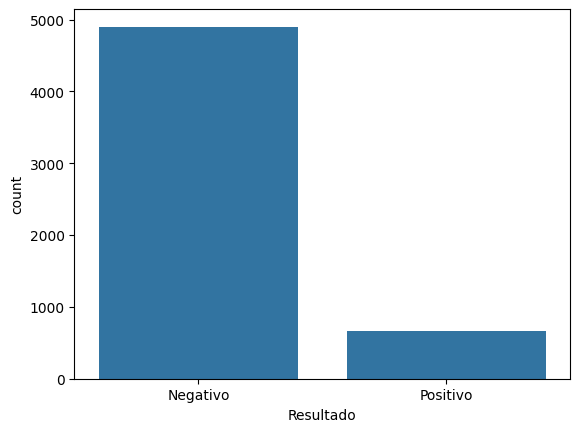

In [55]:
ax = sns.countplot(x="Resultado",data=data)


In [56]:
data_map = data[["Latitud", "Longitud","Resultado"]]
data_map
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_map['Longitud'], data_map['Latitud'])]
geo_df = gpd.GeoDataFrame(data_map, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) 


c:\Users\seder\code\locust\.venv\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


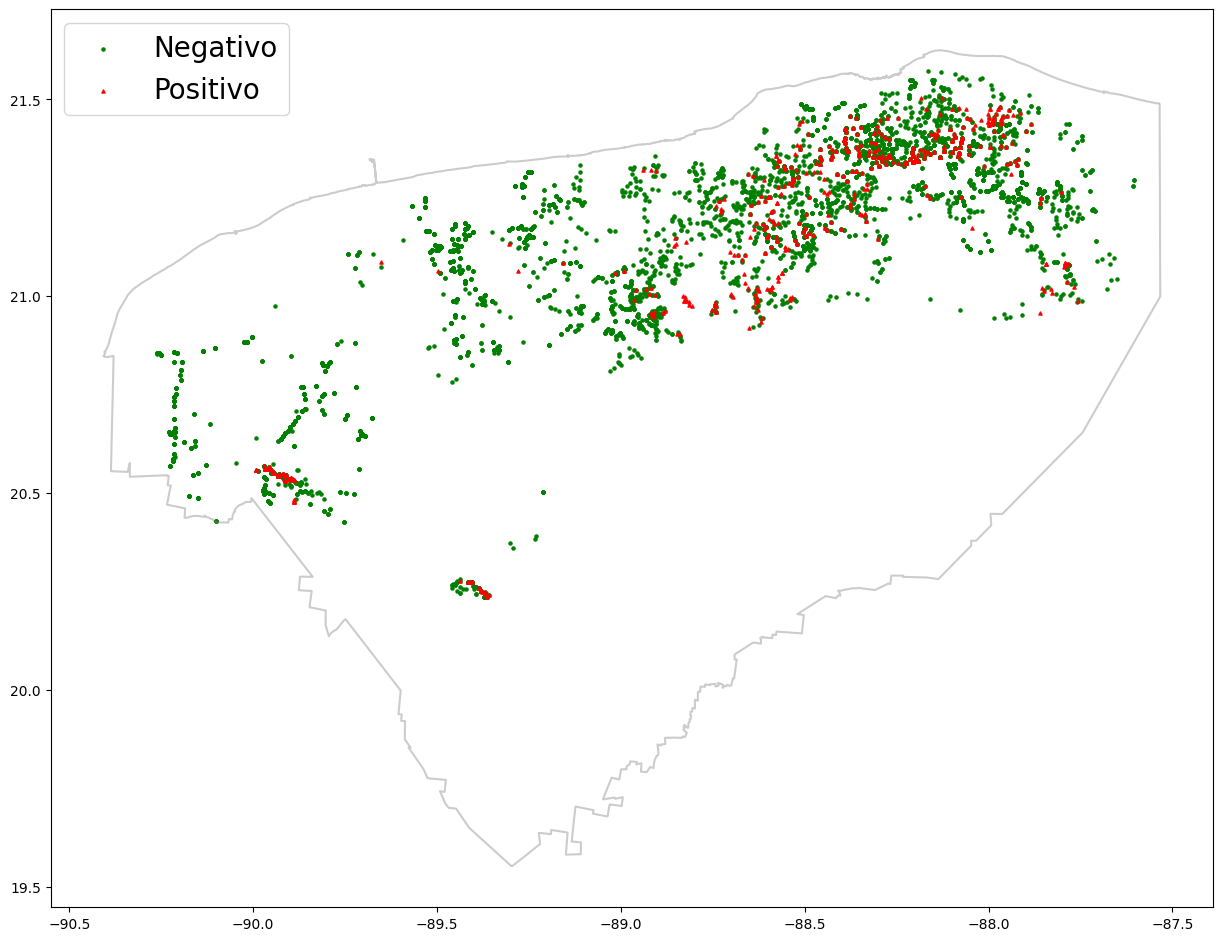

In [57]:
fig, ax = plt.subplots(figsize=(15,15))
map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['Resultado'] == 'Negativo'].plot(ax=ax, 
                                       markersize=5, 
                                       color='green', 
                                       marker='o', 
                                       label='Negativo')

geo_df[geo_df['Resultado'] == 'Positivo'].plot(ax=ax, 
                                       markersize=5, 
                                       color='red', 
                                       marker='^', 
                                       label='Positivo')

plt.legend(prop={'size':20})
